## Dataset Information

Our training dataset contains information from 12,165 hours over 731 days with 14 features (information categories) and 1 target for each hour.<br/>
The file named *train.csv* contains the training set of the problem, while the file *test.csv* contains the test set of the problem.<br/>
Each line of these two files corresponds to a bike sharing record characterized by the following variables:

Variable | Description <br/>
season | season (1:winter, 2:spring, 3:summer, 4:fall) <br/>
yr | year (0: 2011, 1:2012) <br/>
mnth | month (1 to 12) <br/>
hr | hour (0 to 23) <br/>
holiday | weather day is holiday or not <br/>
weekday|day of the week <br/>
workingday | if day is neither weekend nor holiday is 1, otherwise is 0. <br/>
weathersit | <br/>
1: Clear, Few clouds, Partly cloudy, Partly cloudy <br/>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist <br/>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br/>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br/>
temp | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) <br/>
atemp | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) <br/>
hum | Normalized humidity. The values are divided to 100 (max) <br/>
windspeed | Normalized wind speed. The values are divided to 67 (max) <br/>
casual | count of casual users <br/>
registered | count of registered users <br/>
cnt | count of total rental bikes including both casual and registered 

The training set contains the variable `cnt` which is related to the number of bicycles rented in any given 1 hour time-period. The `cnt` (and also `casual` and `registered` which obviously contain direct information about the bike sharing count) variable is missing from the test set as it is the variable to be predicted.

In [26]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow 
from tensorflow import keras
from keras import optimizers
from keras import regularizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

The code that loads the training data from file *train.csv* into a DataFrame of the Pandas library and prints the first 5 lines, is given below. So you can see the 15 variables of the problem.

In [27]:
data_train = 'train.csv'
df_train = pd.read_csv(data_train)
df_train.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,4,0,11,0,0,2,1,1,0.56,0.5303,0.64,0.3582,7,15,22
1,1,0,2,21,0,6,0,1,0.28,0.2727,0.65,0.2537,9,59,68
2,4,1,11,12,0,3,1,1,0.44,0.4394,0.41,0.1940,74,270,344
3,1,1,1,7,0,2,1,2,0.18,0.1970,0.93,0.1642,3,219,222
4,1,1,3,16,0,1,1,1,0.30,0.2727,0.45,0.2985,30,180,210


Also, as for the dimensions of the training set, it consists of 12165 lines and 15 columns. That is, you have the data from 12165 bike sharing records for which you know the number of bicycles rented cnt .

In [28]:
df_train.shape

(12165, 15)

Instead, the file named *test.csv* contains the test set of the problem. As with the training set, you are now given code that loads the test set into a DataFrame of the Pandas library and prints its first 5 lines.

In [29]:
data_test = 'test.csv'
df_test = pd.read_csv(data_test)
df_test.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,1,20,0,4,1,1,0.26,0.2121,0.52,0.4478
1,4,1,10,15,0,5,1,1,0.52,0.5000,0.42,0.4478
2,1,0,1,10,0,0,0,1,0.22,0.2121,0.51,0.2836
3,3,1,8,18,0,3,1,1,0.74,0.6667,0.51,0.2239
4,1,1,2,8,0,1,1,1,0.24,0.2424,0.60,0.0000


As for the dimensions of the test set, as you can see below, it consists of 5214 lines and 12 columns. The missing columns is about the `cnt` variable you are aiming to predict.

In [30]:
df_test.shape

(5214, 12)

## Initial Python Code

Some data types need to be changed from numerical to categorical in order for the model to interpret better these variables.

In [31]:
df_test['season'] = df_test.season.astype('category')
df_test['yr'] = df_test.yr.astype('category')
df_test['mnth'] = df_test.mnth.astype('category')
df_test['hr'] = df_test.hr.astype('category')
df_test['holiday'] = df_test.holiday.astype('category')
df_test['weekday'] = df_test.weekday.astype('category')
df_test['workingday'] = df_test.workingday.astype('category')
df_test['weathersit'] = df_test.weathersit.astype('category')

df_train['season'] = df_train.season.astype('category')
df_train['yr'] = df_train.yr.astype('category')
df_train['mnth'] = df_train.mnth.astype('category')
df_train['hr'] = df_train.hr.astype('category')
df_train['holiday'] = df_train.holiday.astype('category')
df_train['weekday'] = df_train.weekday.astype('category')
df_train['workingday'] = df_train.workingday.astype('category')
df_train['weathersit'] = df_train.weathersit.astype('category')

Lets confirm the converted data types:

In [32]:
df_train.dtypes

season        category
yr            category
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

Lets make some diagrams of categorical features with seaborn and matlplot.

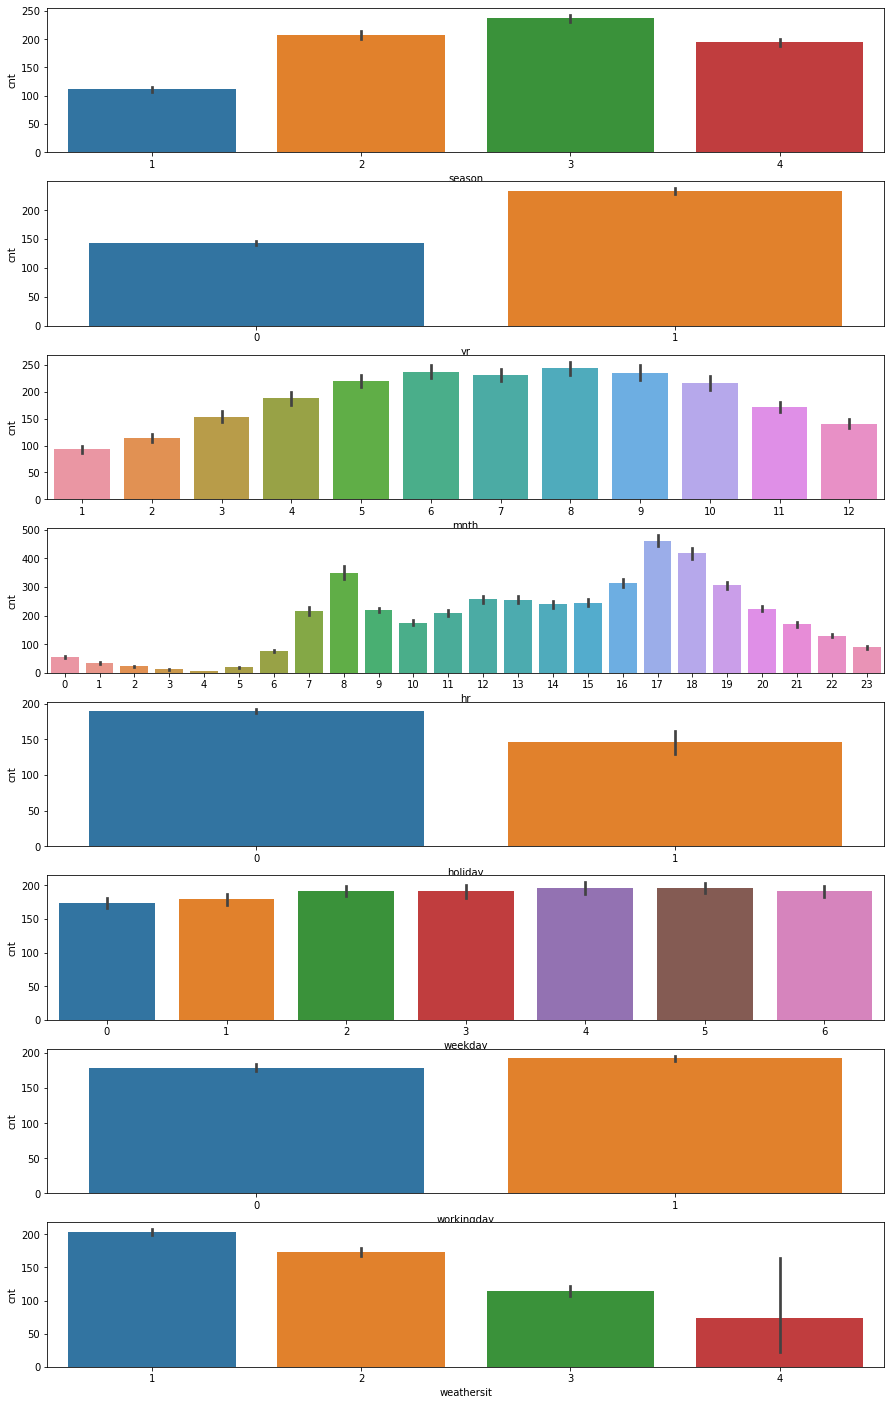

In [33]:
fig,[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8] = plt.subplots(nrows=8, figsize=(15,25))
sn.barplot(x = df_train['season'], y = df_train['cnt'],ax = ax1)
sn.barplot(x = df_train['yr'], y = df_train['cnt'],ax = ax2)
sn.barplot(x = df_train['mnth'], y = df_train['cnt'],ax = ax3)
sn.barplot(x = df_train['hr'], y = df_train['cnt'],ax = ax4)
sn.barplot(x = df_train['holiday'], y = df_train['cnt'],ax = ax5)
sn.barplot(x = df_train['weekday'], y = df_train['cnt'],ax = ax6)
sn.barplot(x = df_train['workingday'], y = df_train['cnt'],ax = ax7)
sn.barplot(x = df_train['weathersit'], y = df_train['cnt'],ax = ax8)

Also, lets make some diagrams of quantitative features with seaborn and matlplot, to see relations between the features and count.

[Text(0.5, 1.0, 'Relation between atemperature and count')]

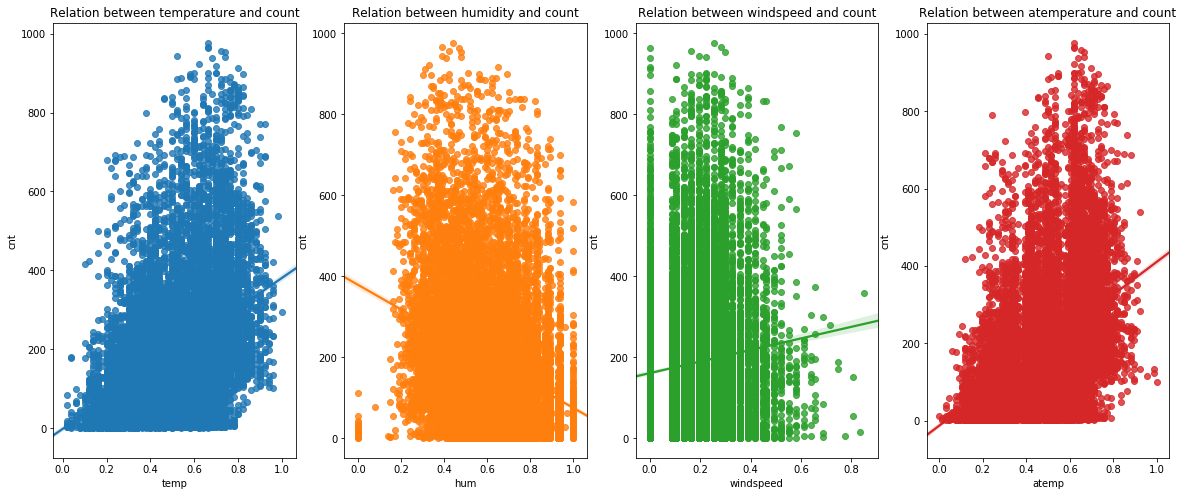

In [34]:
fig,[ax1,ax2,ax3,ax4] = plt.subplots(ncols = 4, figsize = (20,8))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sn.regplot(x = 'temp', y = 'cnt',data = df_train, ax = ax1)
ax1.set(title="Relation between temperature and count")
sn.regplot(x = 'hum', y = 'cnt',data = df_train, ax = ax2)
ax2.set(title="Relation between humidity and count")
sn.regplot(x = 'windspeed', y = 'cnt',data = df_train, ax = ax3)
ax3.set(title="Relation between windspeed and count")
sn.regplot(x = 'atemp', y = 'cnt',data = df_train, ax = ax4)
ax4.set(title="Relation between atemperature and count")

Categorize values to one hot array.

In [35]:
season_train = pd.get_dummies(df_train.season, prefix ='season')
mnth_train = pd.get_dummies(df_train.mnth, prefix ='mnth')
weekday_train = pd.get_dummies(df_train.weekday, prefix ='weekday')
hr_train = pd.get_dummies(df_train.hr, prefix ='hr')
yr_train = pd.get_dummies(df_train.yr, prefix ='yr')
weathersit_train = pd.get_dummies(df_train.weathersit, prefix ='weathersit')
workingday_train = pd.get_dummies(df_train.workingday, prefix ='workingday')
holiday_train = pd.get_dummies(df_train.holiday, prefix ='holiday')


season_test = pd.get_dummies(df_test.season, prefix ='season')
mnth_test = pd.get_dummies(df_test.mnth, prefix ='mnth')
weekday_test = pd.get_dummies(df_test.weekday, prefix ='weekday')
hr_test = pd.get_dummies(df_test.hr, prefix ='hr')
yr_test = pd.get_dummies(df_test.yr, prefix ='yr')
weathersit_test = pd.get_dummies(df_test.weathersit, prefix ='weathersit')
workingday_test = pd.get_dummies(df_test.workingday, prefix ='workingday')
holiday_test = pd.get_dummies(df_test.holiday, prefix ='holiday')

Tables shape.

In [36]:
print(season_train.shape)
season_train.head(5)

(12165, 4)


,season_1,season_2,season_3,season_4
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,1,0,0,0


Now we initialize the quantitative values.

In [37]:
atmosphere_train = df_train[['temp','atemp','hum','windspeed']]
atmosphere_test = df_test[['temp','atemp','hum','windspeed']]

We observe the test.csv doesn't have all the 4 cases of weather, so we add a column of zeros. We do that to avoid problems with input dimension in newral network.

In [38]:
df_test['weathersit_4']=0
missing_weathersit = df_test[['weathersit_4']]

The tables of each feature are now merged.

In [39]:
ohe_test = pd.concat([hr_test,weekday_test,mnth_test,yr_test,season_test,holiday_test,workingday_test,weathersit_test,missing_weathersit,atmosphere_test], axis=1)
ohe_train = pd.concat([hr_train,weekday_train,mnth_train,yr_train,season_train,holiday_train,workingday_train,weathersit_train,atmosphere_train], axis=1)

Seperate features from count.

In [40]:
x = ohe_train
y = df_train[['cnt']]

Create model.

In [41]:
model = Sequential()
model.add(Dense(228,input_dim=61,activity_regularizer=regularizers.l1(0.001),activation='tanh'))
model.add(Dropout(0.20))
model.add(Dense(228,activity_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(228,activity_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(Dropout(0.10))
model.add(Dense(228,activity_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(Dense(1,activity_regularizer=regularizers.l1(0.001), activation='relu'))

Settle the learning rate of Adam optimizer to 0.002.

In [42]:
adam = optimizers.adam(learning_rate=0.002)

Compile model.

In [43]:
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])

Store best weights to the filepath.

In [44]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

Fit data to the model.

In [ ]:
model.fit(x, y, validation_split=0.20, epochs=100, batch_size=50, callbacks=callbacks_list, verbose=0)


Epoch 00001: val_accuracy improved from -inf to 0.01439, saving model to weights.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.01439

Epoch 00003: val_accuracy improved from 0.01439 to 0.01973, saving model to weights.best.hdf5

Epoch 00004: val_accuracy improved from 0.01973 to 0.02261, saving model to weights.best.hdf5

Epoch 00005: val_accuracy improved from 0.02261 to 0.02877, saving model to weights.best.hdf5

Epoch 00006: val_accuracy did not improve from 0.02877

Epoch 00007: val_accuracy did not improve from 0.02877

Epoch 00008: val_accuracy did not improve from 0.02877

Epoch 00009: val_accuracy did not improve from 0.02877

Epoch 00010: val_accuracy did not improve from 0.02877

Epoch 00011: val_accuracy improved from 0.02877 to 0.03000, saving model to weights.best.hdf5

Epoch 00012: val_accuracy did not improve from 0.03000

Epoch 00013: val_accuracy did not improve from 0.03000

Epoch 00014: val_accuracy did not improve from 0.03000

Epoch 00015: val_accura

Load best weights.

In [23]:
model.load_weights("weights.best.hdf5")

Predict test data.

In [24]:
prediction = model.predict(ohe_test)

Finally, we create submission for the kaggle.

In [25]:
submission = pd.DataFrame()
submission['Id'] = range(prediction.shape[0])
submission['Predicted'] = prediction

submission.to_csv("pred.csv", index=False)

Upload the pred.csv and get a scor near to 0,30.